In [ ]:
# Reading cleaned dataset
import pandas as pd
path = '/content/drive/My Drive/BE PROJECT/Lawgical Final/LabelledDataset/'
df = pd.read_csv(path+'cleaned_dataset_new.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Splitting the dataset into train and test sets
X = df.loc[:,'Judgement'].values
y = df.loc[:,'label'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Vectorizinf the corpus using TFIDF Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
cv= CountVectorizer(ngram_range=(1,3), max_features=5000)
X_train_counts= cv.fit_transform(X_train)
tfidf_transformer = TfidfTransformer(use_idf=False)
train_vectors = tfidf_transformer.fit_transform(X_train_counts)
X_test_counts= cv.transform(X_test)
test_vectors = tfidf_transformer.transform(X_test_counts)

In [ ]:
cvs=CountVectorizer()
line1= 'Their are no grounds for bail'
line2= 'it is non bailable offence'
line3= 'bail can be granted or be demanded'
t=[]
t.append(line1)
t.append(line2)
t.append(line3)
counts= cvs.fit_transform(t)

In [ ]:
print(cv.get_feature_names()[1000:1010])
print(X_train_counts.toarray()[3][1000:1010])

['case material', 'case may', 'case mention', 'case must', 'case observe', 'case offence', 'case one', 'case order', 'case others', 'case pending']
[0 2 0 0 0 0 0 0 0 0]


In [ ]:
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_mean_feats(X, features, grp_ids=None, min_tfidf=0.1, top_n=10):
    if grp_ids:
        D = X[grp_ids].toarray()
    else:
        D = X.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

def top_feats_by_class(X, y, features, min_tfidf=0.1, top_n=20):
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(X, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

def plot_tfidf_classfeats_h(dfs):
    fig = plt.figure(figsize=(15, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Count Vectorizer score", labelpad=16, fontsize=14)
        ax.set_ylabel("Word", labelpad=16, fontsize=14)
        ax.set_title("Class = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

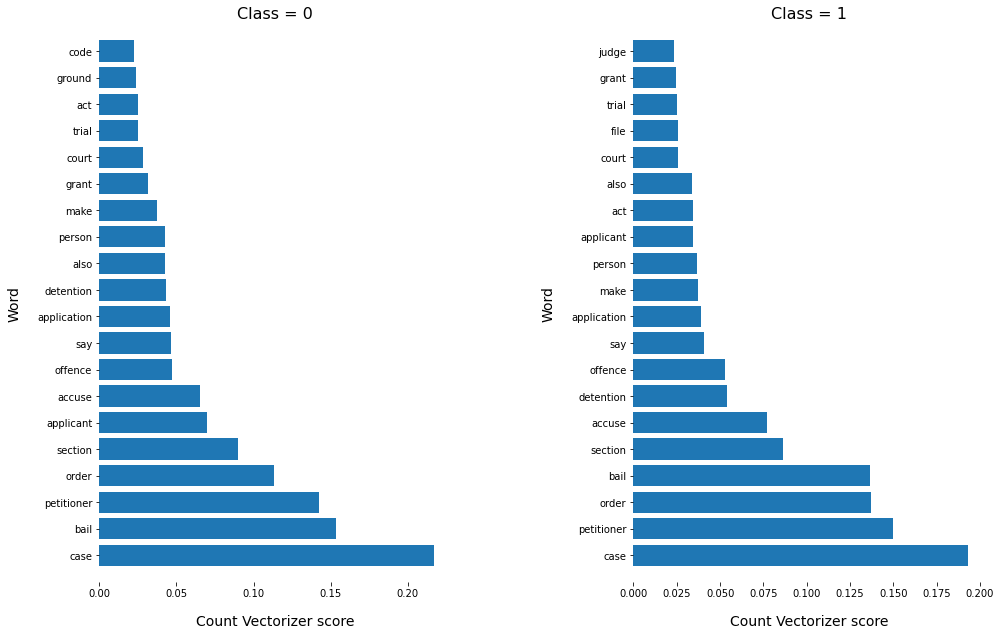

In [ ]:
import matplotlib.pyplot as plt
class_features = cv.get_feature_names()
class_top_dfs = top_feats_by_class(train_vectors, y_train, class_features)
plot_tfidf_classfeats_h(class_top_dfs)


In [ ]:
import numpy as np
tokens_and_counts = zip(cv.get_feature_names(), np.asarray(X_train_counts.sum(axis=0)).ravel())
dataframe=pd.DataFrame(tokens_and_counts, columns=['tokens', 'count'])

In [ ]:
print(dataframe.sort_values('count').tail(10))

          tokens  count
4338     offence  11014
697         also  11333
5761         say  11507
3919        make  12046
454       accuse  12590
5838     section  17744
4795  petitioner  20307
1082        bail  21477
4448       order  25232
1335        case  30939


In [ ]:
vocab=cv.get_feature_names()
print(X_train_counts.shape)
print(train_vectors.shape)
print(test_vectors.shape)
print(len(vocab))

(1363, 7000)
(1363, 7000)
(341, 7000)
7000


In [ ]:
from scipy.sparse import *
print(type(train_vectors))
dense= train_vectors.todense()
print(dense[0][0])

<class 'scipy.sparse.csr.csr_matrix'>
[[0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(vocab[0:100])

['00', '05', '06', '10', '100', '1000', '10000', '104', '107', '108', '109', '10th', '11', '111', '112', '114', '115', '11th', '12', '120b', '120b ipc', '125', '12th', '13', '132', '135', '138', '13th', '14', '141', '142', '143', '144', '145', '147', '147 148', '147 148 149', '148', '148 149', '149', '149 ipc', '14th', '15', '154', '155', '156', '15th', '16', '161', '161 crpc', '164', '164 crpc', '167', '167 code', '167 code criminal', '167 crpc', '1672', '169', '17', '170', '173', '179', '17th', '18', '1860', '18th', '19', '190', '193', '195', '1962', '197', '1973', '1974', '1978', '1980', '1982', '1988', '1991', '1992', '1996', '1a', '1st', '20', '200', '2000', '2001', '2002', '2004', '2005', '2006', '2007', '2008', '2009', '201', '2010', '2011', '2012', '2013', '2014']


In [ ]:
! pip install -q scikit-plot

In [ ]:
from  sklearn.metrics  import accuracy_score
from  sklearn.metrics  import recall_score
from  sklearn.metrics  import precision_score
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

In [ ]:
#logistic regression as suggested by sklearn
#scaling inputvectors using maxabsscaler
from sklearn import preprocessing
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_mabs= max_abs_scaler.fit_transform(train_vectors)
X_test_mabs= max_abs_scaler.transform(test_vectors)

Accuracy Score =  0.779296875
Recall Score =  0.9215017064846417
Precision Score =  0.75


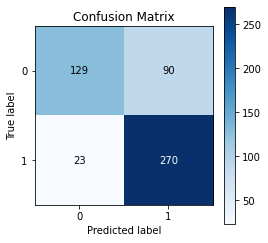

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfclf=RandomForestClassifier(random_state= 4, bootstrap=False)
rfclf.fit(X_train_mabs, y_train)

predicted=rfclf.predict(X_test_mabs)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

Accuracy Score =  0.765625
Recall Score =  0.8327645051194539
Precision Score =  0.7746031746031746


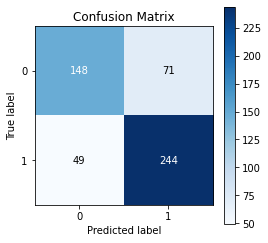

In [ ]:
#Logistic Regression with standardized values
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', penalty='l1')
lr.fit(X_train_mabs, y_train)

predicted = lr.predict(X_test_mabs)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

In [ ]:
features=pd.DataFrame({'features': cv.get_feature_names(), 'coef_': lr.coef_[0]})
print('Label 0')
sortedfeatures= features.sort_values(by='coef_')
print(sortedfeatures[0:10])
print('Label 1')
print(sortedfeatures[-10:])

Label 0
              features     coef_
3423  petition dismiss -3.794654
2058        find merit -2.391819
598          applicant -1.714208
3622             press -1.675967
4510   submission make -1.655317
2454           instant -1.630514
1433         court may -1.593849
2988                mr -1.548765
4954            worker -1.521066
3868         recording -1.501817
Label 1
             features     coef_
3786            quash  2.057687
909          bond sum  2.287793
4333     shall tamper  2.358178
608   applicant shall  2.494299
2123        forthwith  2.950505
2752      like amount  3.205482
4309        set aside  3.924133
2274           hereby  3.941405
4329      shall leave  4.179893
2815    make absolute  4.881847


Accuracy Score =  0.689453125
Recall Score =  0.856655290102389
Precision Score =  0.6820652173913043


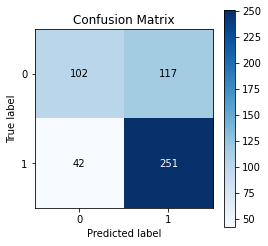

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.001).fit(train_vectors, y_train)

predicted = clf.predict(test_vectors)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

Accuracy Score =  0.650390625
Recall Score =  0.8361774744027304
Precision Score =  0.651595744680851


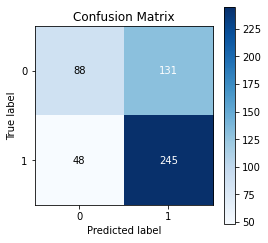

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13, weights='distance')
knn.fit(X_train_mabs, y_train)

predicted = knn.predict(X_test_mabs)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

Accuracy Score =  0.767578125
Recall Score =  0.8430034129692833
Precision Score =  0.771875


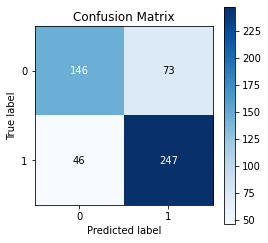

In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC(penalty='l1', dual=False, max_iter=2000, C=.5)
svm.fit(X_train_mabs, y_train)

predicted = svm.predict(X_test_mabs)
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

In [ ]:
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_positive_coefficients, top_negative_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['blue' if c > 0 else 'red' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()

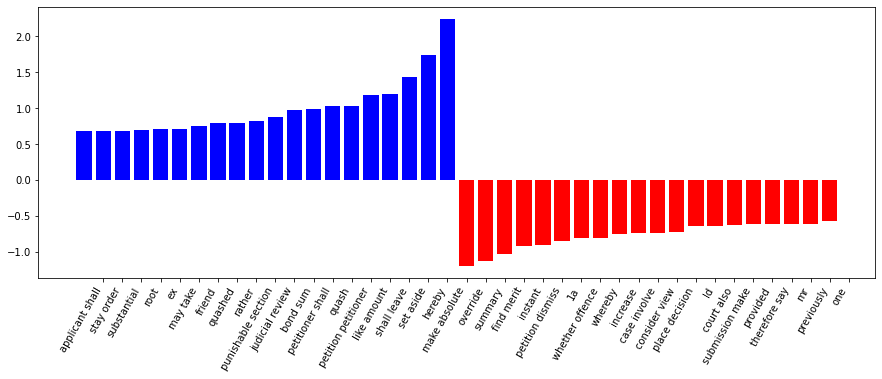

In [ ]:
plot_coefficients(svm, cv.get_feature_names())

In [ ]:
import pickle

In [ ]:
pickle.dump(rfclf, open('BOWRF_model.sav', 'wb'))
pickle.dump(lr, open('BOWLR_model.sav', 'wb'))
pickle.dump(svm, open('BOWSVM_model.sav', 'wb'))
pickle.dump(knn, open('BOWKNN_model.sav', 'wb'))
pickle.dump(clf, open('BOWNB_model.sav', 'wb'))